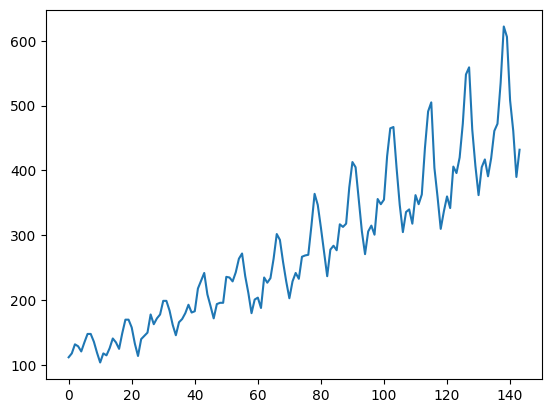

,Passengers
0,112
1,118
2,132
3,129
4,121


In [51]:
# Load dữ liệu và đồ thi cho số liệu 
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/home/namanh/DHBK_AI_ML_DL/Course/Day9/Course4/data/airline-passengers.csv',usecols=[1], engine='python')
plt.plot(dataset)
plt.show()
dataset.head()

In [52]:
# load các thư viện cần thiết 
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [53]:
# cố định seed ngẫu nhiên để tái sử dụng 
numpy.random.seed(7)

In [18]:
# tải bộ dữ liệu
dataframe = pd.read_csv('/home/namanh/DHBK_AI_ML_DL/Course/Day9/Course4/data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [19]:
# chuẩn hoá bộ dữ liệu vì lstm nhạy cảm với dữ liệu
# đầu vào, đặc biệt khi sử dụng hàm kích hoạt là signmoid hay tanh
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [20]:
# chia bộ dữ liệu 66% cho train còn lại cho test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [21]:
# Tạo ra một bộ dữ liệu mà yêu cầu đầu vào 
# là dataset dạng array mà ta quan tâm và look_back
# là số bước phía trước dùng để dự đoán dữ liệu sau

# Trong đây X là số khách tại thời điểm t
# và Y là số khách tại thời điểm t+1
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t and Y=t+1
# Tạo bộ dữ liệu mới cho áp dụng RNN, lstm
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [23]:
# reshape input to be [samples, time steps, features]
# Thêm dạng dữ liệu đầu vào thích hợp cho quá trình train mạng lstm
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# LSTM Network for Regression

In [24]:
# Tạo model lstm cho việc training
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

2022-10-13 04:34:57.815185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-13 04:34:57.815212: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-13 04:34:57.815235: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (namanh-Precision-M4800): /proc/driver/nvidia/version does not exist
2022-10-13 04:34:57.815478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
94/94 - 1s - loss: 0.0402 - 1s/epoch - 13ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0194 - 144ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0146 - 143ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0135 - 155ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0125 - 151ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0116 - 154ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0106 - 143ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0093 - 147ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0082 - 152ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0067 - 145ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0054 - 147ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0043 - 149ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0035 - 149ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0029 - 144ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0025 - 154ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0023 - 149ms/epoc

In [25]:
# Dự đoán dữ liệu test
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Làm ngược dự đoán trrước khi tính lỗi để đảm bảo cùng đơn vị dữ liệu đầu
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Tính toán hàm mất mát
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 2ms/step
Train Score: 22.78 RMSE
Test Score: 48.27 RMSE


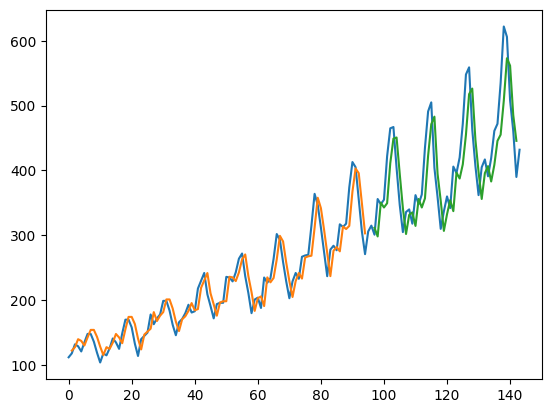

In [26]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression Using the Window Method
Phrase the problem so that multiple, recent time steps can be used to make the prediction for the next time step.

This is called a window, and the size of the window is a parameter that can be tuned for each problem.

Về cơ bản ta có thể tạo chuỗi dữ liệu thời gian mà đầu ra tại thời điểm t chỉ phụ thuộc vào dữ liệu ngay trước tại thời điểm t-1. Đây là trường hợp lý tưởng và đơn giản nhât cho việc dữ liệu tại thời điêm t có thể phụ thuộc vào rất nhiều dữ liệu trước -> phương pháp window. 

In [28]:
# load the dataset
dataframe = pandas.read_csv('/home/namanh/DHBK_AI_ML_DL/Course/Day9/Course4/data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [29]:
print(trainX)

[[[0.01544401 0.02702703 0.05405405]]

 [[0.02702703 0.05405405 0.04826255]]

 [[0.05405405 0.04826255 0.03281853]]

 [[0.04826255 0.03281853 0.05984557]]

 [[0.03281853 0.05984557 0.08494207]]

 [[0.05984557 0.08494207 0.08494207]]

 [[0.08494207 0.08494207 0.06177607]]

 [[0.08494207 0.06177607 0.02895753]]

 [[0.06177607 0.02895753 0.        ]]

 [[0.02895753 0.         0.02702703]]

 [[0.         0.02702703 0.02123553]]

 [[0.02702703 0.02123553 0.04247104]]

 [[0.02123553 0.04247104 0.07142857]]

 [[0.04247104 0.07142857 0.05984557]]

 [[0.07142857 0.05984557 0.04054055]]

 [[0.05984557 0.04054055 0.08687258]]

 [[0.04054055 0.08687258 0.12741312]]

 [[0.08687258 0.12741312 0.12741312]]

 [[0.12741312 0.12741312 0.10424709]]

 [[0.12741312 0.10424709 0.05598456]]

 [[0.10424709 0.05598456 0.01930502]]

 [[0.05598456 0.01930502 0.06949806]]

 [[0.01930502 0.06949806 0.07915059]]

 [[0.06949806 0.07915059 0.08880308]]

 [[0.07915059 0.08880308 0.14285713]]

 [[0.08880308 0.14285713 

In [30]:
print(trainY)

[0.04826255 0.03281853 0.05984557 0.08494207 0.08494207 0.06177607
 0.02895753 0.         0.02702703 0.02123553 0.04247104 0.07142857
 0.05984557 0.04054055 0.08687258 0.12741312 0.12741312 0.10424709
 0.05598456 0.01930502 0.06949806 0.07915059 0.08880308 0.14285713
 0.11389962 0.13127413 0.14285713 0.18339768 0.18339768 0.15444016
 0.11196911 0.08108109 0.1196911  0.12934363 0.14671814 0.17181468
 0.14864865 0.15250966 0.22007722 0.24324325 0.26640925 0.2027027
 0.16795367 0.13127413 0.17374519 0.17760617 0.17760617 0.25482625
 0.25289574 0.24131274 0.26833975 0.3088803  0.32432434 0.25675675
 0.20656371 0.14671814 0.18725869 0.19305018 0.16216215 0.25289574
 0.23745173 0.25096524 0.3088803  0.38223937 0.36486486 0.2992278
 0.24131274 0.1911197  0.24131274 0.26640925 0.24903473 0.31467178
 0.3185328  0.32046333 0.4073359  0.5019305  0.46911195 0.40154442
 0.32818535 0.25675675 0.3359073  0.34749034 0.33397684 0.41119692
 0.4034749  0.4131274  0.52123547 0.5965251  0.58108103 0.484556

In [31]:
# Tạo model lstm cho việc training
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.0212 - 1s/epoch - 13ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0088 - 144ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0073 - 151ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0065 - 149ms/epoch - 2ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0057 - 149ms/epoch - 2ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0051 - 146ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0046 - 152ms/epoch - 2ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0043 - 149ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0041 - 141ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0039 - 145ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0039 - 152ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0039 - 146ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0038 - 151ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0036 - 160ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0035 - 199ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0036 - 156ms/epoc

In [32]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 2ms/step
Train Score: 22.64 RMSE
Test Score: 58.77 RMSE


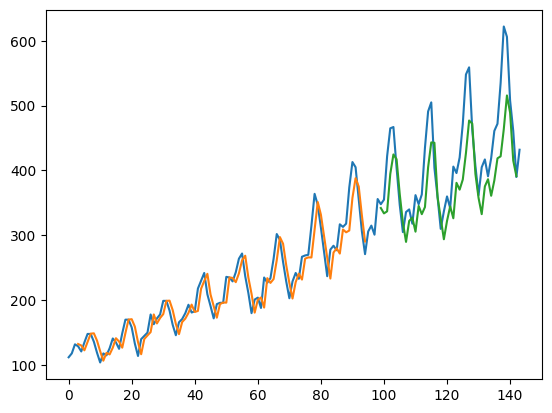

In [33]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression with Time Steps

Thay vi cố định time steps như trước, ta sẽ coi toàn bộ dữ liệu trước trở thành tiền đề đề để sinh ra dự liệu sau

In [35]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('/home/namanh/DHBK_AI_ML_DL/Course/Day9/Course4/data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Thay đổi ở các lệnh sau
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [36]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.0174 - 1s/epoch - 14ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0082 - 181ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0071 - 180ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0061 - 179ms/epoch - 2ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0057 - 183ms/epoch - 2ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0047 - 186ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0045 - 190ms/epoch - 2ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0041 - 216ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0040 - 182ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0038 - 187ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0038 - 177ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0038 - 183ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0038 - 184ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0037 - 186ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0037 - 191ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0037 - 183ms/epoc

In [37]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 3ms/step
Train Score: 27.10 RMSE
Test Score: 64.56 RMSE


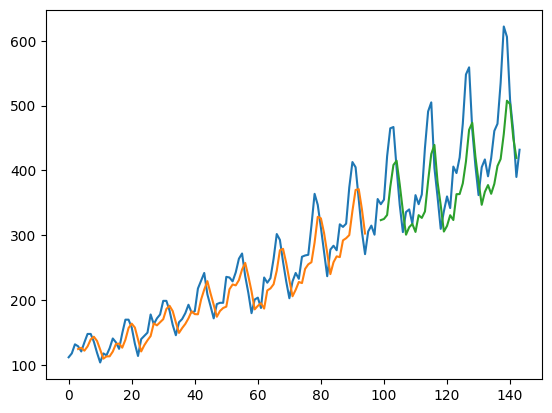

In [38]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM with Memory Between Batches

In [43]:
# load the dataset
dataframe = pandas.read_csv('/home/namanh/DHBK_AI_ML_DL/Course/Day9/Course4/data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [44]:
# create and fit the LSTM network
# Thay đổi ở đây 
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

92/92 - 1s - loss: 0.0150 - 1s/epoch - 13ms/step
92/92 - 0s - loss: 0.0184 - 184ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0125 - 175ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0096 - 165ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0077 - 170ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0066 - 175ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0060 - 178ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0057 - 181ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0055 - 178ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0053 - 173ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0053 - 173ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0052 - 169ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0051 - 172ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0050 - 174ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0050 - 172ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0049 - 171ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0049 - 185ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0048 - 178ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0048 - 174ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0047 - 173ms

In [45]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

44/44 [==============================] - 0s 1ms/step
Train Score: 23.96 RMSE
Test Score: 53.38 RMSE


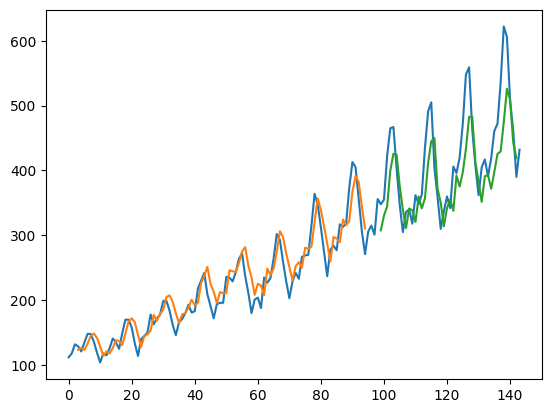

In [46]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTMs with Memory Between Batches

Ý tưởng ở đây là thêm nhiều lớp lstm để tăng hiệu quả của mạng

In [47]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('/home/namanh/DHBK_AI_ML_DL/Course/Day9/Course4/data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [48]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

92/92 - 3s - loss: 0.0052 - 3s/epoch - 28ms/step
92/92 - 0s - loss: 0.0069 - 345ms/epoch - 4ms/step
92/92 - 0s - loss: 0.0061 - 328ms/epoch - 4ms/step
92/92 - 0s - loss: 0.0058 - 313ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 275ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 314ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 302ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 296ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0054 - 307ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0054 - 286ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0054 - 274ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0054 - 318ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0054 - 298ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0053 - 353ms/epoch - 4ms/step
92/92 - 0s - loss: 0.0053 - 304ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0053 - 299ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0053 - 284ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0053 - 276ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0053 - 302ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0052 - 303ms

In [49]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

44/44 [==============================] - 0s 2ms/step
Train Score: 22.25 RMSE
Test Score: 61.49 RMSE


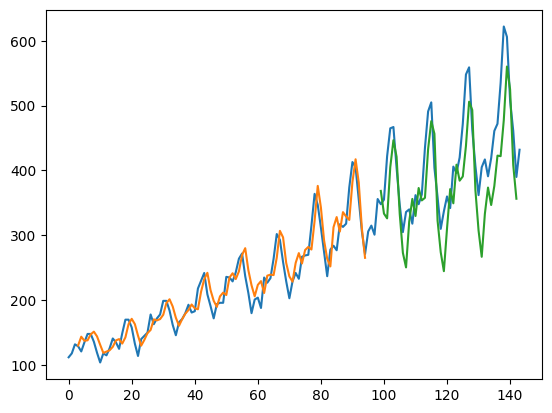

In [50]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Test Neural Network 

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, optimizers, losses

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('/home/namanh/DHBK_AI_ML_DL/Course/Day9/Course4/data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# simple model to recognize
model = tf.keras.Sequential()
model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss="mean_squared_error")

model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=64, verbose=1)

Epoch 1/25
2/2 [==============================] - 0s 121ms/step - loss: 0.0610 - val_loss: 0.3696
Epoch 2/25
2/2 [==============================] - 0s 27ms/step - loss: 0.0584 - val_loss: 0.3587
Epoch 3/25
2/2 [==============================] - 0s 26ms/step - loss: 0.0561 - val_loss: 0.3479
Epoch 4/25
2/2 [==============================] - 0s 25ms/step - loss: 0.0538 - val_loss: 0.3375
Epoch 5/25
2/2 [==============================] - 0s 30ms/step - loss: 0.0515 - val_loss: 0.3273
Epoch 6/25
2/2 [==============================] - 0s 29ms/step - loss: 0.0494 - val_loss: 0.3174
Epoch 7/25
2/2 [==============================] - 0s 28ms/step - loss: 0.0472 - val_loss: 0.3078
Epoch 8/25
2/2 [==============================] - 0s 25ms/step - loss: 0.0453 - val_loss: 0.2985
Epoch 9/25
2/2 [==============================] - 0s 27ms/step - loss: 0.0433 - val_loss: 0.2894
Epoch 10/25
2/2 [==============================] - 0s 29ms/step - loss: 0.0414 - val_loss: 0.2806
Epoch 11/25
2/2 [===========